## Implementación EM para GMMs

### Inicialización:
Decidir cuantos clusters (c) utilizaremos. Luego, inicializar los parámetros para $c$ normales: $c$ medias ($\mu_c$), $c$  desvios ($\sigma_c$), y $c$ pesos ($\pi_c$).

### Paso E:

Calcular para cada punto $x^{(i)}$ la probabilidad ($r_{ic}$) de que el punto pertenezca al cluster c:
$$r_{ic} = P(c | x^{(i)}) = \frac{P(c)P(x^{(i)} | c)}{P(x^{(i)})} = \frac{\pi_c N(x^{(i)} \ | \ \mu_c,\sigma_c)}{\Sigma_{k=1}^K \pi_k N(x^{(i)} \ | \ \mu_k,\sigma_k)}$$

donde 

$${\displaystyle {\begin{aligned}N(x^{(i)},\mu_c,\sigma_c)&{}={\frac {1}{\sigma_c {\sqrt {2\pi }}}}e^{-{\frac {(x^{(i)}-\mu_c )^{2}}{2\sigma_c ^{2}}}},\quad \pi = 3.141592... .\\\end{aligned}}}$$

### Paso M:
Para cada cluster c, actualizar $\pi_c$, $\mu_c$, y $\sigma_c$ según los datos:

$$ N_c = \sum_{i}{r_{ic}}$$

$$ \mu^{(nuevo)}_c = \frac{1}{N_c}\sum_{i}{r_{ic}x^{(i)}}$$
$$ \sigma^{(nuevo)}_c = \frac{1}{N_c}\sum_{i}{r_{ic}(x^{(i)} - \mu^{(nuevo)}_c)^2} $$
$$ \pi^{(nuevo)}_c = \frac{N_c}{n}$$



### Iterar 
Iterar hasta que la log-likelihood del modelo converja:

$$ln \ p(\boldsymbol{X} \ | \ \boldsymbol{\pi},\boldsymbol{\mu},\boldsymbol{\sigma}) \ = \ \Sigma_{i=1}^N \ ln(\Sigma_{k=1}^K \pi_k N(x^{(i)} \ | \ \mu_k,\sigma_k))$$




In [7]:
%matplotlib inline
import scipy.stats
from sklearn.cluster import KMeans
import math 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

def gmm_train(X, n_clusters, tolerance = 1e-3):
    v_mu, v_sigma, v_pi = inicializacion(n_clusters, X)
    old_llk = 0
    tolerance = 1e-3 # indica la mínima ganancia en llk para que el algoritmo continúe.
    gain = np.inf

    while(gain > tolerance):
        print_iter(v_mu, v_sigma, v_pi, n_clusters)
        r = e(X, n_clusters, v_mu, v_sigma, v_pi)
        v_mu, v_sigma, v_pi = m(X, n_clusters, r)
        llk = log_likelihood(X, v_mu, v_sigma, v_pi, n_clusters)
        print("Log likelihood: ", llk)
        gain = llk - old_llk
   
    return v_mu, v_sigma, v_pi


def inicializacion(n_clusters, X):
    ##################
    # COMPLETAR
    # Inicializar v_mu, v_sigma, v_pi (vectores que contienen una componente por cluster)
    ##################
    
    return v_mu, v_sigma, v_pi

def norm(x, mu, sigma):
    return scipy.stats.norm(mu, sigma).pdf(x)

def e(X, n_clusters, v_mu, v_sigma, v_pi):
    r = np.ones((len(X), n_clusters))
    
    ##################
    # COMPLETAR
    # r[i, c] debera contener la probabilidad estimada P(c | x^(i))
    ##################
    
    return r

def m(X, n_clusters, r):
    N = np.zeros(n_clusters)
    v_mu_new = np.zeros(n_clusters)
    v_sigma_new = np.zeros(n_clusters)
    v_pi_new = np.zeros(n_clusters)
    
    ##################
    # COMPLETAR
    # v_mu_new, v_sigma_new, v_pi_new deberán contener los valores actualizados.
    ##################
    
    return v_mu_new, v_sigma_new, v_pi_new


def log_likelihood(X, v_mu, v_sigma, v_pi, n_clusters):
    suma = 0
    for i in range(len(X)):
        suma_k = 0
        for k in range(n_clusters):
            suma_k += v_pi[k] * norm(X[i], v_mu[k], v_sigma[k])
        suma += math.log(suma_k)
    return suma


def print_iter( v_mu, v_sigma, v_pi, n_clusters):
    for c in range(n_clusters):
        print("C{} => mu={} +- {} (pi={})".format(c+1, "%.2f" % v_mu[c], "%.2f" % v_sigma[c], "%.2f" % v_pi[c]), end=" | ")
    print()

def dibujar(X, v_mu, v_sigma, v_pi, n_clusters, title="GMMs"):
    plt.figure()
    plt.title(title)
    colors = sns.color_palette("hls", n_clusters)
    plt.plot(X, [1] * len(X), ".")
    for k in range(n_clusters):
        col = colors[k]
#         plt.plot([v_mu[k], v_mu[k]], [0, 2], label="$\mu_{}$".format(k), color=col)
        plt.plot([v_mu[k] - v_sigma[k], v_mu[k] + v_sigma[k]], [1.1,1.1], color=col, label="$\mu_{}$".format(k))
        plt.plot([v_mu[k] - v_sigma[k], v_mu[k] - v_sigma[k]], [0.9,1.2], color=col)
        plt.plot([v_mu[k] + v_sigma[k], v_mu[k] + v_sigma[k]], [0.9,1.2], color=col)
    plt.yticks([])
    plt.ylim([0, 2])
    plt.legend()
    


DESCOMENTAR lo anterior
Salida esperada:


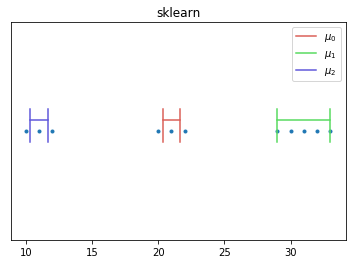

In [8]:
# Datos para ejemplo
np.random.seed(134)
X = np.array([10, 11, 12, 20, 21, 22, 30, 31, 32, 29, 33])
n_clusters = 3

# DESCOMENTAR
# v_mu, v_sigma, v_pi = gmm_train(X, n_clusters)
# dibujar(X, v_mu, v_sigma, v_pi, n_clusters, title="implementacion propia")
print("DESCOMENTAR lo anterior")

print("Salida esperada:")
# SALIDA ESPERADA:
sklearn_gmm = GaussianMixture(n_components=3)
sklearn_gmm.fit(X.reshape(-1, 1))

dibujar(X, sklearn_gmm.means_.ravel(), sklearn_gmm.covariances_.ravel(), sklearn_gmm.weights_.ravel(), n_clusters, title="sklearn")


DESCOMENTAR lo anterior
Salida esperada:


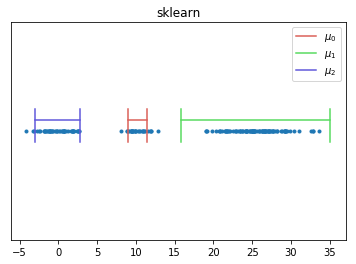

In [9]:
# Datos para ejemplo
np.random.seed(134)
n_clusters = 3
X = np.concatenate([np.random.randn(50) * 2, (np.random.randn(30) + 10), (np.random.randn(100) * 3 + 25)])
# v_mu, v_sigma, v_pi = gmm_train(X, n_clusters)
# dibujar(X, v_mu, v_sigma, v_pi, n_clusters, title="implementacion propia")

print("DESCOMENTAR lo anterior")
print("Salida esperada:")

sklearn_gmm = GaussianMixture(n_components=n_clusters)
sklearn_gmm.fit(X.reshape(-1, 1))

dibujar(X, sklearn_gmm.means_.ravel(), sklearn_gmm.covariances_.ravel(), sklearn_gmm.weights_.ravel(), n_clusters, title="sklearn")
